In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
dataset = "/content/gdrive/MyDrive/fire_dataset"

In [4]:
import os
os.listdir("/content/gdrive/MyDrive/fire_dataset/train")

['non_fire_images', 'fire_images']

In [5]:
#importing all the necessary libraries
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
img_path='/content/gdrive/MyDrive/fire_dataset/train/fire_images/fire.2.png'
img=cv2.imread(img_path)

In [7]:
img.shape

(960, 1440, 3)

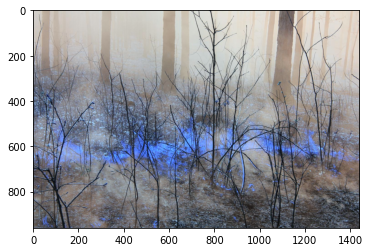

In [8]:
plt.imshow(img)

In [9]:
classes=['fire_images', 'non_fire_images']
img_size=224

In [10]:
training_Data=[]
def create_training_Data():
    for category in classes:
        path = os.path.join(dataset,'train',category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array=cv2.resize(backtorgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

678


In [13]:
import random
random.shuffle(training_Data)

In [14]:
X=[]
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
trainX=np.array(X).reshape(-1,img_size,img_size,3)
trainY=np.array(y)

In [15]:
trainX.shape

(678, 224, 224, 3)

In [16]:
test_Data=[]
def create_test_Data():
    for category in classes:
        path = os.path.join(dataset,'test',category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array=cv2.resize(backtorgb,(img_size,img_size))
                test_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [17]:
create_test_Data()

In [18]:
print(len(test_Data))

300


In [19]:
X=[]
y=[]
for features,label in test_Data:
    X.append(features)
    y.append(label)
testX=np.array(X).reshape(-1,img_size,img_size,3)
testY=np.array(y)

In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Adam
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2048, activation='relu'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2, activation='softmax')
])

In [21]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         2457984   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 384)        0

In [23]:
history = model.fit(trainX,trainY,epochs=10,validation_data=(testX, testY))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


22/22 [==============================] - 13s 50ms/step - loss: 3.7998 - accuracy: 0.6534 - val_loss: 1.0246 - val_accuracy: 0.7600
Epoch 2/10
22/22 [==============================] - 1s 29ms/step - loss: 0.8879 - accuracy: 0.7640 - val_loss: 0.3358 - val_accuracy: 0.8833
Epoch 3/10
22/22 [==============================] - 1s 29ms/step - loss: 0.4514 - accuracy: 0.8127 - val_loss: 0.3268 - val_accuracy: 0.8567
Epoch 4/10
22/22 [==============================] - 1s 29ms/step - loss: 0.4441 - accuracy: 0.7994 - val_loss: 0.2975 - val_accuracy: 0.8933
Epoch 5/10
22/22 [==============================] - 1s 29ms/step - loss: 0.3565 - accuracy: 0.8304 - val_loss: 0.2730 - val_accuracy: 0.9067
Epoch 6/10
22/22 [==============================] - 1s 29ms/step - loss: 0.3431 - accuracy: 0.8628 - val_loss: 0.3290 - val_accuracy: 0.8600
Epoch 7/10
22/22 [==============================] - 1s 28ms/step - loss: 0.3181 - accuracy: 0.8746 - val_loss: 0.2903 - val_accuracy: 0.8667
Epoch 8/10
22/22 [=====

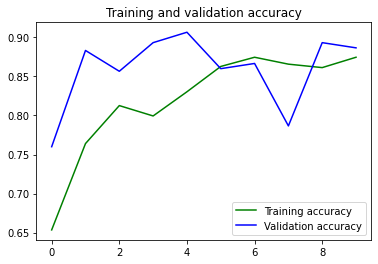

<Figure size 432x288 with 0 Axes>

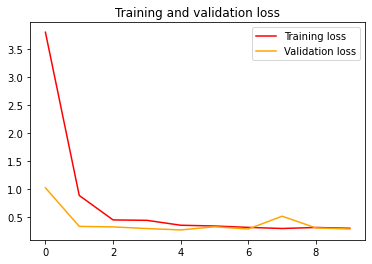

<Figure size 432x288 with 0 Axes>

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [26]:
import keras
from keras.models import Model
from tensorflow.keras import layers
from keras.layers.core import Dense, Activation
mobile = keras.applications.mobilenet.MobileNet()
base_input=model.layers[0].input
base_output=model.layers[-4].output
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer)
final_output=layers.Activation('sigmoid')(final_output)
new_model=keras.Model(inputs=base_input,outputs=final_output)
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
new_model.fit(trainX,trainY,epochs=10,validation_data=(testX, testY))

17235968/17225924 [==============================] - 0s 0us/step
Epoch 1/10
22/22 [==============================] - 3s 48ms/step - loss: 5.4727 - accuracy: 0.6475 - val_loss: 0.5069 - val_accuracy: 0.7567
Epoch 2/10
22/22 [==============================] - 1s 28ms/step - loss: 0.5638 - accuracy: 0.7271 - val_loss: 0.9096 - val_accuracy: 0.7567
Epoch 3/10
22/22 [==============================] - 1s 28ms/step - loss: 0.5545 - accuracy: 0.7271 - val_loss: 0.5965 - val_accuracy: 0.7567
Epoch 4/10
22/22 [==============================] - 1s 28ms/step - loss: 0.6953 - accuracy: 0.7316 - val_loss: 0.4841 - val_accuracy: 0.7700
Epoch 5/10
22/22 [==============================] - 1s 28ms/step - loss: 0.5110 - accuracy: 0.7507 - val_loss: 0.5014 - val_accuracy: 0.7633
Epoch 6/10
22/22 [==============================] - 1s 28ms/step - loss: 0.5324 - accuracy: 0.7330 - val_loss: 0.5015 - val_accuracy: 0.7567
Epoch 7/10
22/22 [==============================] - 1s 28ms/step - loss: 0.4899 - accurac